Zakres lat dostępnych dla Warszawy: 1953 - 2013
Liczba wierszy po usunięciu NaN: 728


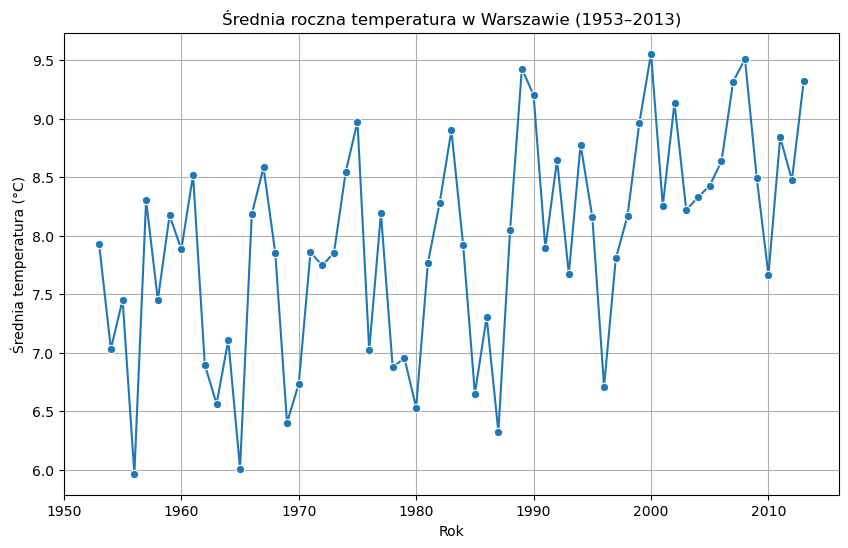

Średnia temperatura 1953–1980: 7.49 °C
Średnia temperatura 1990–2013: 8.51 °C
Różnica: 1.02 °C


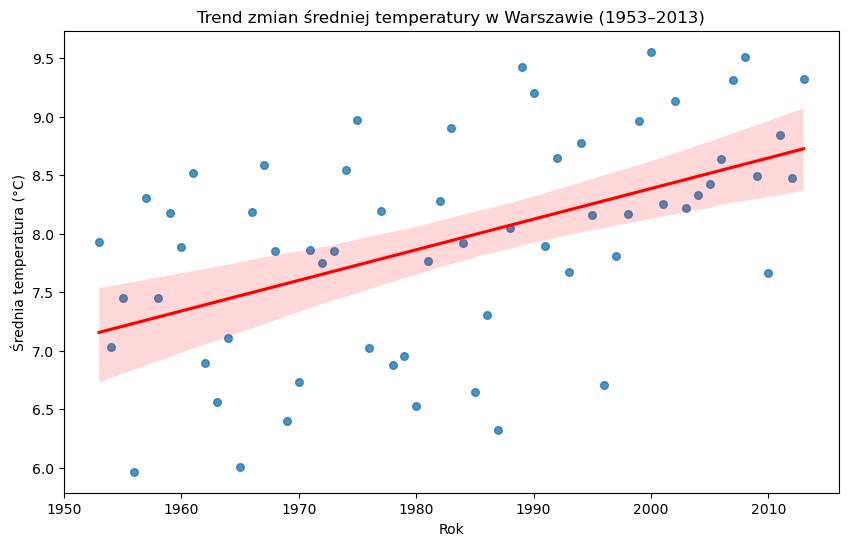

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("GlobalLandTemperaturesByCity.csv")

print("Zakres lat dostępnych dla Warszawy:", df_warsaw["dt"].dt.year.min(), "-", df_warsaw["dt"].dt.year.max())
print("Liczba wierszy po usunięciu NaN:", len(df_warsaw))


df_warsaw = df[df["City"] == "Warsaw"].copy()
df_warsaw["dt"] = pd.to_datetime(df_warsaw["dt"])
df_warsaw = df_warsaw[(df_warsaw["dt"].dt.year >= 1953) & (df_warsaw["dt"].dt.year <= 2013)]
df_warsaw = df_warsaw.dropna(subset=["AverageTemperature"])


df_warsaw["year"] = df_warsaw["dt"].dt.year
mean_temp_by_year = df_warsaw.groupby("year")["AverageTemperature"].mean().reset_index()


plt.figure(figsize=(10,6))
sns.lineplot(data=mean_temp_by_year, x="year", y="AverageTemperature", marker="o")
plt.title("Średnia roczna temperatura w Warszawie (1953–2013)")
plt.xlabel("Rok")
plt.ylabel("Średnia temperatura (°C)")
plt.grid(True)
plt.show()


mean_1953_1980 = mean_temp_by_year[(mean_temp_by_year["year"] >= 1953) & (mean_temp_by_year["year"] <= 1980)]["AverageTemperature"].mean()
mean_1990_2013 = mean_temp_by_year[(mean_temp_by_year["year"] >= 1990) & (mean_temp_by_year["year"] <= 2013)]["AverageTemperature"].mean()

temp_diff = mean_1990_2013 - mean_1953_1980
print(f"Średnia temperatura 1953–1980: {mean_1953_1980:.2f} °C")
print(f"Średnia temperatura 1990–2013: {mean_1990_2013:.2f} °C")
print(f"Różnica: {temp_diff:.2f} °C")


plt.figure(figsize=(10,6))
sns.regplot(data=mean_temp_by_year, x="year", y="AverageTemperature", scatter_kws={'s':30}, line_kws={'color':'red'})
plt.title("Trend zmian średniej temperatury w Warszawie (1953–2013)")
plt.xlabel("Rok")
plt.ylabel("Średnia temperatura (°C)")
plt.show()


Czy można zauważyć trend zmian klimatycznych?
Tak,
analiza danych wskazuje na wzrost średniej rocznej temperatury o około 1°C między latami 1953-1980 a 1990-2013 
Na wykresie trendu widać systematyczny wzrost temperatur w kolejnych dekadach, co potwierdza 
zjawisko ocieplania się klimatu również na poziomie lokalnym (Warszawa).

Jakie dodatkowe dane można by dołączyć (np. opady, emisje CO₂)?
1.Dane o opadach atmosferycznych (deszcz, śnieg, wilgotność).
2.Informacje o emisjach CO₂ lub innych gazów cieplarnianych.
3.Dane o prędkości i kierunku wiatru.
4.Dane o temperaturze minimalnej i maksymalnej, nie tylko średniej.
